In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
import seaborn as sns
from IPython import display
import geopandas as gpd

In [ ]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\Counties35-45_041018.csv')

In [ ]:
data.columns
#5800 cubic feet of gas is 1 boe

In [ ]:
#D2 = data[['APINO', 'YR','JAN_OIL','FEB_OIL', 'MAR_OIL','APR_OIL', 'MAY_OIL','JUN_OIL', 'JUL_OIL','AUG_OIL','SEP_OIL','OCT_OIL',
      #'NOV_OIL','DEC_OIL']]
#D2 = data[['APINO', 'YR','JAN_GAS','FEB_GAS', 'MAR_GAS','APR_GAS', 'MAY_GAS','JUN_GAS', 'JUL_GAS','AUG_GAS','SEP_GAS','OCT_GAS',
      #'NOV_GAS','DEC_GAS']]
D2 = data[['APINO', 'YR','JAN_WATER','FEB_WATER', 'MAR_WATER','APR_WATER', 'MAY_WATER','JUN_WATER', 'JUL_WATER','AUG_WATER',
           'SEP_WATER','OCT_WATER', 'NOV_WATER','DEC_WATER']]

In [ ]:
masterDF = pd.DataFrame()
dfList = []
APIS = []
for well in D2.APINO.unique()[0:]:
    d3 = D2[D2['APINO'] == well][['JAN_WATER','FEB_WATER', 'MAR_WATER','APR_WATER', 'MAY_WATER','JUN_WATER', 'JUL_WATER','AUG_WATER',
           'SEP_WATER','OCT_WATER', 'NOV_WATER','DEC_WATER']].stack()
    #print(str(D2[D2['APINO'] == well].YR.min()))
    ind = pd.date_range(str(D2[D2['APINO'] == well].YR.min()), periods=len(D2[D2['APINO'] == well])*12, freq='M')
    ts = pd.Series(d3.values, index=ind)
    dfList.append(ts.to_frame(name=str(well)))
    APIS.append(well)
    #masterDF = pd.concat([masterDF, ts.to_frame(name=str(well))])
masterDF =  pd.concat(dfList, axis=1)

In [ ]:
masterDF = pd.concat(dfList, axis=1).fillna(0)

In [ ]:
well_locs = pd.read_csv(r'd:\wells.csv')

In [ ]:
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == well][['latitude', 'longitude']].values)

In [ ]:
for i in tqdm(range(484)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(masterDF.iloc[i].values/np.max(np.max(masterDF))),
                alpha=0.5, c='g')
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.max(np.vstack(coords)[0:,1]),np.min(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(masterDF.index[i])
    plt.savefig('D:/fun/'+str(i)+'.png')

In [ ]:
masterDF.iloc[0:484,0:].to_csv('C:\\Users\\jesse.pisel\\Downloads\\TTL_Prod041018\\35to45ts_water.csv')

# Now let's visualized the cleaned data

In [4]:
ts1 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts.csv', index_col=[0])
ts2 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts.csv', index_col=[0])
ts3 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts.csv', index_col=[0])
ts4 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts.csv', index_col=[0])

In [5]:
bigTSoil = pd.concat([ts1, ts2, ts3, ts4], axis=1)

In [6]:
APIS = bigTSoil.columns.values
type(APIS)

numpy.ndarray

In [7]:
well_locs = pd.read_csv(r'd:\wells.csv')
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == int(well)][['latitude', 'longitude']].values)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
ts1g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_gas.csv', index_col=[0])
ts2g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_gas.csv', index_col=[0])
ts3g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_gas.csv', index_col=[0])
ts4g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_gas.csv', index_col=[0])
bigTSgas = pd.concat([ts1g, ts2g, ts3g, ts4g], axis=1)

In [9]:
ts1w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_water.csv', index_col=[0])
ts2w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_water.csv', index_col=[0])
ts3w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_water.csv', index_col=[0])
ts4w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_water.csv', index_col=[0])
bigTSwater = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)

100%|██████████████████████████████████████████████████████████████████████████████| 484/484 [1:36:34<00:00, 11.97s/it]


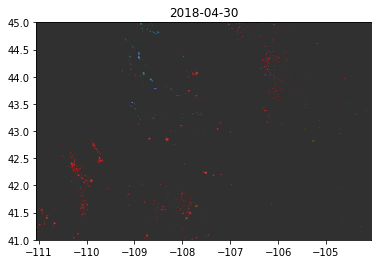

In [20]:
%matplotlib inline
for i in tqdm(range(484)):
    plt.rcParams['axes.facecolor'] = '#303030'
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.4, c='g', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.1, c='w', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.4, c='r', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.1, c='w', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='b', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='w', linewidths=0)
    display.clear_output(wait=True)
    plt.xlim(np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(bigTSwater.index[i])
    
    plt.savefig('D:/fun/ongw'+str(i)+'.png', dpi=250)

In [10]:
import cartopy
import cartopy.crs as ccrs


In [11]:
import cartopy.io.img_tiles as cimgt


In [12]:
mapbox = cimgt.MapboxTiles('pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjamdmaHlxajkybnhmMnFtcXppaW90bDVjIn0.i2qzLErAxTjsmwl127P-jQ',
                           'mapbox.dark')

In [14]:
# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=mapbox.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]), np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0])])
# Add the Stamen data at zoom level 8.
ax.add_image(mapbox, 8)

for i in tqdm(range(484)):
    ax = plt.axes(projection=mapbox.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]), np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0])])
    # Add the Stamen data at zoom level 8.
    ax.add_image(mapbox, 8)
    
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.4, c='g', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.4, c='r', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='b', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    
    plt.title(bigTSwater.index[i])
    plt.savefig('D:/fun/withMap'+str(i)+'.png', dpi=250)
    plt.clf()


  0%|                                                                                          | 0/484 [00:00<?, ?it/s]C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
100%|██████████████████████████████████████████████████████████████████████████████| 484/484 [2:09:28<00:00, 16.05s/it]


<Figure size 432x288 with 0 Axes>

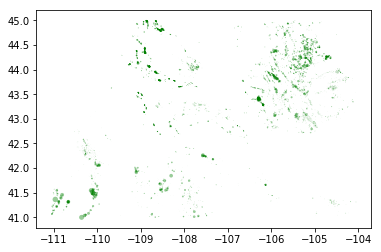

In [13]:
plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSoil.iloc[125].values/np.max(np.max(bigTSoil))),
                alpha=0.4, c='g', linewidths=0)

In [27]:
oilcs = bigTSoil.cumsum()
gascs = bigTSgas.cumsum()
watercs = bigTSwater.cumsum()

In [31]:
# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=mapbox.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]), np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0])])
# Add the Stamen data at zoom level 8.
ax.add_image(mapbox, 8)

for i in tqdm(range(484)):
    ax = plt.axes(projection=mapbox.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]), np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0])])
    # Add the Stamen data at zoom level 8.
    ax.add_image(mapbox, 8)
    
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(oilcs.iloc[i].values/np.max(np.max(oilcs))),
                alpha=0.4, c='g', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(oilcs.iloc[i].values/np.max(np.max(oilcs))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(gascs.iloc[i].values/np.max(np.max(gascs))),
                alpha=0.4, c='r', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(gascs.iloc[i].values/np.max(np.max(gascs))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(watercs.iloc[i].values/np.max(np.max(watercs))),
                alpha=0.1, c='b', linewidths=0,transform=ccrs.Geodetic())
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=100*(watercs.iloc[i].values/np.max(np.max(watercs))),
                alpha=0.1, c='w', linewidths=0,transform=ccrs.Geodetic())
    
    plt.title(bigTSwater.index[i])
    plt.savefig('D:/fun/cumulative'+str(i)+'.png', dpi=250)
    plt.clf()

  0%|                                                                                          | 0/484 [00:00<?, ?it/s]C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
100%|██████████████████████████████████████████████████████████████████████████████| 484/484 [1:45:12<00:00, 13.04s/it]


<Figure size 432x288 with 0 Axes>

In [210]:
from sklearn import preprocessing

In [211]:
le = preprocessing.LabelEncoder()
le.fit(well_locs.BOTFORM.values.astype(str))
classed = le.transform(well_locs.BOTFORM.values.astype(str))

In [213]:
well_locs['bfclass'] = classed

In [13]:
outcrops = gpd.read_file(r'J:\Geology\WSGS\GIS\Sample locations\bedrock.shp')

Text(0.5,1,'GROS VENTR')

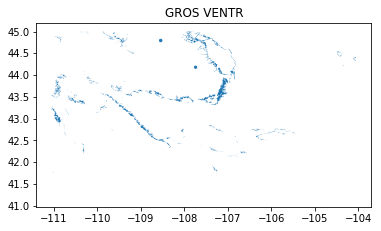

In [285]:
%matplotlib inline
outcrops[outcrops['Unit_Name'].str.upper().str.contains(well_locs.BOTFORM.unique()[40])].plot()
plt.scatter(well_locs[well_locs['BOTFORM'] == well_locs.BOTFORM.unique()[40]].longitude,
            well_locs[well_locs['BOTFORM'] == well_locs.BOTFORM.unique()[40]].latitude,
            s=well_locs[well_locs['BOTFORM'] == well_locs.BOTFORM.unique()[40]].TD/1000)
plt.title(well_locs.BOTFORM.unique()[40])

In [283]:
well_locs.BOTFORM.unique()[800]

'LANE'

In [113]:
horizontals = well_locs[well_locs['HORIZ_DIR'] == 'H']
directionals = well_locs[well_locs['HORIZ_DIR'] == 'D']

<IPython.core.display.Javascript object>


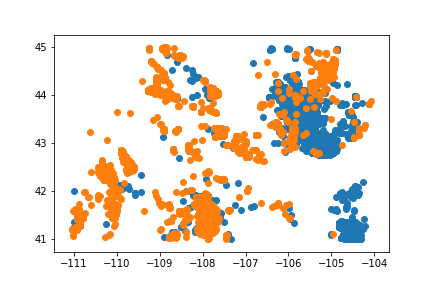

In [130]:
plt.scatter(horizontals.longitude, horizontals.latitude)
plt.scatter(directionals.longitude, directionals.latitude)

In [142]:
hcoords = []
for well in horizontals.APINO.values:
    hcoords.append(horizontals[horizontals['APINO'] == int(well)][['latitude', 'longitude']].values)

In [208]:
%matplotlib inline
for i in tqdm(range(484)):
    plt.scatter(np.vstack(hcoords)[0:,1], np.vstack(hcoords)[0:,0], s=200*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))))
    plt.savefig('D:/fun/horizontals'+str(i)+'.png', dpi=50)
    plt.clf()


 13%|██████████▌                                                                      | 63/484 [01:28<09:53,  1.41s/it]

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

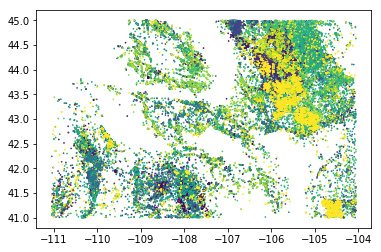

In [218]:
plt.scatter(well_locs.longitude, well_locs.latitude, c=well_locs.bfclass, s=0.5)

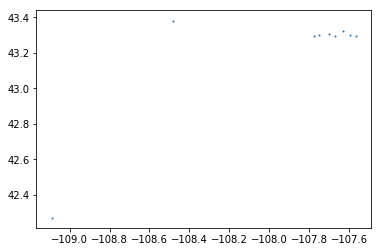

In [258]:
%matplotlib inline

for i in np.arange(0, 25000, 500):
    plt.clf()
    plt.scatter(well_locs[well_locs['TD']>i].longitude, well_locs[well_locs['TD']>i].latitude, s=1)
    
    plt.savefig('D:/fun/horizontals'+str(i)+'.png', dpi=100)


In [334]:
for i in range(484):
    fig, ax = plt.subplots()
    bigTSgas.iloc[i].hist(ax=ax, bottom=0.1)
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_xlim(0,500000)
    ax.set_title(bigTSgas.iloc[i].name)
    plt.savefig('D:/fun/horizontals'+str(i)+'.png', dpi=100)
    plt.clf()
    plt.close()
